In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
n = 28*28    #feature space dimension 
N_train = len(x_train)
N_test = len(x_test)

x_test = x_test.reshape((N_test, n))
x_train = x_train.reshape((N_train, n))

In [4]:
x_train = x_train[0:6000][:]
x_test = x_test[0:500][:]

In [5]:
x_train_scaled = x_train/225
x_test_scaled = x_test/225

In [6]:
y_train = y_train[0:6000]
y_test = y_test[0:500]

# Simple One Layer Autoencoder

In [7]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

Size of our encoded representation

In [8]:
encoding_dim = 32

Input Placeholder

In [9]:
input_img = Input(shape=(784,))

The encoded representation of the input

In [10]:
encoded = Dense(encoding_dim, activation='relu')(input_img)

Reconstruction of the input

In [11]:
decoded = Dense(784,activation='sigmoid')(encoded)

Autoencoder Model

In [12]:
autoencoder = Model(input_img, decoded)

Input to encoded dimension model

In [13]:
encoder = Model(input_img, encoded)

encoded data to the input data model

In [14]:
# Create a placeholder for an encoded input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
#create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

Training

In [15]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [16]:
autoencoder.fit(x_train_scaled, x_train_scaled, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test_scaled, x_test_scaled), verbose=2)

Epoch 1/50
24/24 - 0s - loss: 0.6945 - val_loss: 0.6943
Epoch 2/50
24/24 - 0s - loss: 0.6945 - val_loss: 0.6943
Epoch 3/50
24/24 - 0s - loss: 0.6945 - val_loss: 0.6943
Epoch 4/50
24/24 - 0s - loss: 0.6945 - val_loss: 0.6943
Epoch 5/50
24/24 - 0s - loss: 0.6944 - val_loss: 0.6942
Epoch 6/50
24/24 - 0s - loss: 0.6944 - val_loss: 0.6942
Epoch 7/50
24/24 - 0s - loss: 0.6944 - val_loss: 0.6942
Epoch 8/50
24/24 - 0s - loss: 0.6944 - val_loss: 0.6942
Epoch 9/50
24/24 - 0s - loss: 0.6943 - val_loss: 0.6941
Epoch 10/50
24/24 - 0s - loss: 0.6943 - val_loss: 0.6941
Epoch 11/50
24/24 - 0s - loss: 0.6943 - val_loss: 0.6941
Epoch 12/50
24/24 - 0s - loss: 0.6942 - val_loss: 0.6941
Epoch 13/50
24/24 - 0s - loss: 0.6942 - val_loss: 0.6940
Epoch 14/50
24/24 - 0s - loss: 0.6942 - val_loss: 0.6940
Epoch 15/50
24/24 - 0s - loss: 0.6942 - val_loss: 0.6940
Epoch 16/50
24/24 - 0s - loss: 0.6941 - val_loss: 0.6940
Epoch 17/50
24/24 - 0s - loss: 0.6941 - val_loss: 0.6939
Epoch 18/50
24/24 - 0s - loss: 0.6941 - 

In [17]:
encoded_train = encoder.predict(x_train_scaled)
encoded_test = encoder.predict(x_test_scaled)
decoded_tests = decoder.predict(encoded_test)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras.utils import to_categorical

In [20]:
model = Sequential()

model.add(Dense(512, input_dim=encoding_dim, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

adam = optimizers.Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam)

In [21]:
model.fit(encoded_train, y_train, batch_size=4, epochs=30, shuffle=True, verbose=2, validation_data=(encoded_test, y_test))

Epoch 1/30
1500/1500 - 5s - loss: 1.0637 - val_loss: 0.8631
Epoch 2/30
1500/1500 - 5s - loss: 0.7323 - val_loss: 0.8567
Epoch 3/30
1500/1500 - 5s - loss: 0.6182 - val_loss: 0.7515
Epoch 4/30
1500/1500 - 5s - loss: 0.5353 - val_loss: 0.7058
Epoch 5/30
1500/1500 - 5s - loss: 0.4645 - val_loss: 0.6921
Epoch 6/30
1500/1500 - 5s - loss: 0.3929 - val_loss: 0.8015
Epoch 7/30
1500/1500 - 5s - loss: 0.3339 - val_loss: 0.8089
Epoch 8/30
1500/1500 - 5s - loss: 0.2776 - val_loss: 0.8046
Epoch 9/30
1500/1500 - 7s - loss: 0.2262 - val_loss: 0.7777
Epoch 10/30
1500/1500 - 5s - loss: 0.2014 - val_loss: 0.7542
Epoch 11/30
1500/1500 - 5s - loss: 0.1617 - val_loss: 0.7863
Epoch 12/30
1500/1500 - 5s - loss: 0.1349 - val_loss: 0.9835
Epoch 13/30
1500/1500 - 5s - loss: 0.1169 - val_loss: 0.9493
Epoch 14/30
1500/1500 - 5s - loss: 0.0966 - val_loss: 0.9439
Epoch 15/30
1500/1500 - 5s - loss: 0.1093 - val_loss: 0.9436
Epoch 16/30
1500/1500 - 5s - loss: 0.0762 - val_loss: 0.9802
Epoch 17/30
1500/1500 - 5s - loss

# Adding a sparsity constraint on the encoded representations

In [22]:
from tensorflow.keras import regularizers

encoding_dim = 32
input_img = Input(shape=(784,))

# add a Dense layer with a L1 activity regularizer

encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)

decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# Deep Autoencoder

In [23]:
input_img = Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train_scaled, x_train_scaled,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_scaled, x_test_scaled))

Epoch 1/100
24/24 [==============================] - 0s 16ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 2/100
24/24 [==============================] - 0s 17ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 3/100
24/24 [==============================] - 0s 13ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 4/100
24/24 [==============================] - 0s 12ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 5/100
24/24 [==============================] - 0s 12ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 6/100
24/24 [==============================] - 0s 12ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 7/100
24/24 [==============================] - 0s 11ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 8/100
24/24 [==============================] - 0s 11ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 9/100
24/24 [==============================] - 0s 11ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 10/100
24/24 [==============================] - 0s 12ms/step - loss: 0.6930 - val_loss: 0.6930

24/24 [==============================] - 0s 13ms/step - loss: 0.6925 - val_loss: 0.6925
Epoch 83/100
24/24 [==============================] - 0s 17ms/step - loss: 0.6925 - val_loss: 0.6925
Epoch 84/100
24/24 [==============================] - 0s 15ms/step - loss: 0.6925 - val_loss: 0.6924
Epoch 85/100
24/24 [==============================] - 0s 17ms/step - loss: 0.6925 - val_loss: 0.6924
Epoch 86/100
24/24 [==============================] - 0s 10ms/step - loss: 0.6925 - val_loss: 0.6924
Epoch 87/100
24/24 [==============================] - 0s 12ms/step - loss: 0.6924 - val_loss: 0.6924
Epoch 88/100
24/24 [==============================] - 0s 15ms/step - loss: 0.6924 - val_loss: 0.6924
Epoch 89/100
24/24 [==============================] - 0s 12ms/step - loss: 0.6924 - val_loss: 0.6924
Epoch 90/100
24/24 [==============================] - 0s 16ms/step - loss: 0.6924 - val_loss: 0.6924
Epoch 91/100
24/24 [==============================] - 0s 17ms/step - loss: 0.6924 - val_loss: 0.6924
Epo

In [31]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[4](encoded_input)
decoder_layer = autoencoder.layers[5](decoder_layer)
decoder_layer = autoencoder.layers[6](decoder_layer)
decoder = Model(encoded_input, decoder_layer)

In [32]:
encoded_train = encoder.predict(x_train_scaled)
encoded_test = encoder.predict(x_test_scaled)
decoded_test = decoder.predict(encoded_test)

In [25]:
model.fit(encoded_train, y_train, batch_size=4, epochs=30, shuffle=True, verbose=2, validation_data=(encoded_test, y_test))

Epoch 1/30
1500/1500 - 5s - loss: 1.5249 - val_loss: 1.4536
Epoch 2/30
1500/1500 - 4s - loss: 1.0815 - val_loss: 1.3718
Epoch 3/30
1500/1500 - 4s - loss: 0.9530 - val_loss: 1.2452
Epoch 4/30
1500/1500 - 5s - loss: 0.8528 - val_loss: 1.2284
Epoch 5/30
1500/1500 - 5s - loss: 0.7736 - val_loss: 1.1969
Epoch 6/30
1500/1500 - 5s - loss: 0.6894 - val_loss: 1.2281
Epoch 7/30
1500/1500 - 5s - loss: 0.6206 - val_loss: 1.2750
Epoch 8/30
1500/1500 - 5s - loss: 0.5539 - val_loss: 1.2856
Epoch 9/30
1500/1500 - 5s - loss: 0.4888 - val_loss: 1.2558
Epoch 10/30
1500/1500 - 5s - loss: 0.4274 - val_loss: 1.3249
Epoch 11/30
1500/1500 - 5s - loss: 0.3692 - val_loss: 1.4407
Epoch 12/30
1500/1500 - 5s - loss: 0.3193 - val_loss: 1.4921
Epoch 13/30
1500/1500 - 6s - loss: 0.2795 - val_loss: 1.5249
Epoch 14/30
1500/1500 - 5s - loss: 0.2382 - val_loss: 1.5815
Epoch 15/30
1500/1500 - 5s - loss: 0.1935 - val_loss: 1.5531
Epoch 16/30
1500/1500 - 4s - loss: 0.1679 - val_loss: 1.6075
Epoch 17/30
1500/1500 - 4s - loss

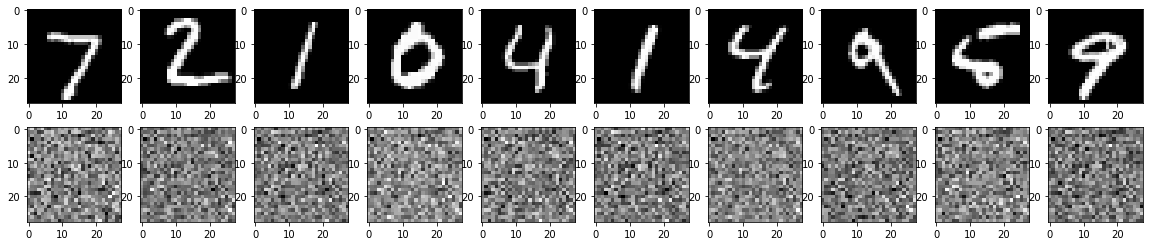

In [34]:
# use Matplotlib
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_scaled[i].reshape(28, 28))
    plt.gray()
#    ax.get_xaxis().set_visible(False)
#    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_test[i].reshape(28, 28))
    plt.gray()
#    ax.get_xaxis().set_visible(False)
#    ax.get_yaxis().set_visible(False)
plt.show()